# Title of Project
# Movie Recommendation System

# Objective
# To develop a movie recommendation system that suggests movies to users based on their preferences.


# Data Source
# Movies Recommendation dataset from GitHub repository

In [34]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [2]:
# Import Data
url = 'https://raw.githubusercontent.com/SiddardhaShayini/Movie-Recommendation-System/refs/heads/main/Movies%20Recommendation.csv'
movies_df = pd.read_csv(url)

In [3]:
# Describe Data
print("Data Overview:")
print(movies_df.head())
print("\nData Info:")
print(movies_df.info())
print("\nDescriptive Statistics:")
print(movies_df.describe())

Data Overview:
   Movie_ID      Movie_Title                       Movie_Genre Movie_Language  \
0         1       Four Rooms                      Crime Comedy             en   
1         2        Star Wars  Adventure Action Science Fiction             en   
2         3     Finding Nemo                  Animation Family             en   
3         4     Forrest Gump              Comedy Drama Romance             en   
4         5  American Beauty                             Drama             en   

   Movie_Budget  Movie_Popularity Movie_Release_Date  Movie_Revenue  \
0       4000000         22.876230         09-12-1995        4300000   
1      11000000        126.393695         25-05-1977      775398007   
2      94000000         85.688789         30-05-2003      940335536   
3      55000000        138.133331         06-07-1994      677945399   
4      15000000         80.878605         15-09-1999      356296601   

   Movie_Runtime  Movie_Vote  ...  \
0           98.0         6.5  ... 

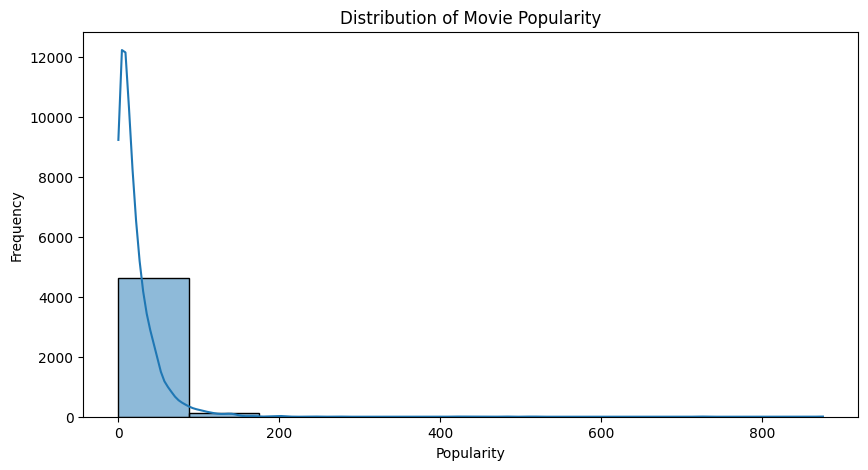

In [7]:
# Data Visualization
plt.figure(figsize=(10, 5))
sns.histplot(movies_df['Movie_Popularity'], bins=10, kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Data Preprocessing
# Handling missing values
movies_df = movies_df.dropna()

In [18]:
# Encode genres
if 'Movie_Genre' in movies_df.columns:
    genres = movies_df['Movie_Genre'].str.get_dummies(sep=', ')
    movies_df = pd.concat([movies_df, genres], axis=1)

In [19]:
# Drop non-numeric columns and any unnecessary columns
X = movies_df.drop(columns=[
    'Movie_Title', 'Movie_ID', 'Movie_Revenue', 'Movie_Genre',
    'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
    'Movie_Production_House', 'Movie_Production_Country',
    'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast',
    'Movie_Crew', 'Movie_Director', 'Movie_Release_Date'
])

In [20]:
# Define Target Variable (y) and Feature Variables (X)
y = movies_df['Movie_Popularity']  # Assuming this is numeric

In [21]:
# Ensure all features are numeric before fitting the model
X = X.apply(pd.to_numeric, errors='coerce')  # Convert everything to numeric, replace non-numeric with NaN
X.fillna(0, inplace=True)  # Fill NaN values with 0

In [35]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% variance
X_reduced = pca.fit_transform(X)

In [36]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Modeling
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(X_train)

NearestNeighbors(algorithm='brute', metric='cosine')

In [38]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    # Predicting based on the popularity of the movies in the test set
    distances, indices = model.kneighbors(X_test, n_neighbors=5)  # Find 5 nearest neighbors
    recommendations = []

    for idx in range(len(X_test)):
        recommended_popularity = y_train.iloc[indices[idx]].mean()  # Average popularity of the recommendations
        actual_popularity = y_test.iloc[idx]
        recommendations.append((actual_popularity, recommended_popularity))

    # Convert to DataFrame for easy analysis
    results_df = pd.DataFrame(recommendations, columns=['Actual Popularity', 'Recommended Popularity'])

    # Calculate MAE and RMSE
    mae = mean_absolute_error(results_df['Actual Popularity'], results_df['Recommended Popularity'])
    rmse = np.sqrt(mean_squared_error(results_df['Actual Popularity'], results_df['Recommended Popularity']))

    print("\nModel Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [51]:
# Prediction function
def recommend_movies(movie_title, model, movies_df, n_recommendations=5):
    try:
        if movie_title not in movies_df['Movie_Title'].values:
            print(f"'{movie_title}' is not found in the dataset.")
            return pd.DataFrame(columns=['Movie_Title', 'Movie_Genre'])

        movie_idx = movies_df[movies_df['Movie_Title'] == movie_title].index[0]
        # Create a DataFrame for the input
        input_data = pd.DataFrame(X.iloc[movie_idx, :]).T
        distances, indices = model.kneighbors(input_data, n_neighbors=n_recommendations + 1)
        recommended_movies = movies_df.iloc[indices.flatten()[1:]]
        return recommended_movies
    except IndexError:
        return pd.DataFrame(columns=['Movie_Title', 'Movie_Genre'])  # Return an empty DataFrame


In [52]:
# Evaluate the model
evaluate_model(model, X_test, y_test)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 13.19
Root Mean Squared Error (RMSE): 43.66


In [58]:
# Example usage
movie_to_recommend = 'Aladdin'  # Change this to a valid title from the dataset
recommended_movies = recommend_movies(movie_to_recommend, model, movies_df)

print("\nRecommended Movies:")
if not recommended_movies.empty:
    print(recommended_movies[['Movie_Title', 'Movie_Genre']])
else:
    print("No recommendations available. Please check the movie title.")


Recommended Movies:
         Movie_Title                                       Movie_Genre
3873     Cloud Atlas                             Drama Science Fiction
2791  Ninja Assassin                             Action Crime Thriller
3131  Blade: Trinity  Science Fiction Action Horror Thriller Adventure
1696      Death Race                   Action Thriller Science Fiction
1116      Prom Night                                      Crime Horror


In [54]:
# List all movie titles
movie_titles = movies_df['Movie_Title'].tolist()

# Print the movie titles
for title in movie_titles:
    print(title)

Star Wars
Finding Nemo
American Beauty
Pirates of the Caribbean: The Curse of the Black Pearl
Kill Bill: Vol. 1
Apocalypse Now
The Simpsons Movie
Eternal Sunshine of the Spotless Mind
Pirates of the Caribbean: Dead Man's Chest
8 Mile
Million Dollar Baby
American History X
Mars Attacks!
Memento
Blade Runner
Before Sunset
Raiders of the Lost Ark
Indiana Jones and the Temple of Doom
Indiana Jones and the Last Crusade
Lock, Stock and Two Smoking Barrels
Back to the Future
The Big Lebowski
Charlie and the Chocolate Factory
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Two Towers
The Lord of the Rings: The Return of the King
Spirited Away
Brokeback Mountain
Akira
The Dark Knight
Ocean's Eleven
Ocean's Twelve
Back to the Future Part II
K-PAX
The Interpreter
The Good German
Sin City
Sin City: A Dame to Kill For
Back to the Future Part III
Star Trek: First Contact
Hotel Rwanda
Indiana Jones and the Kingdom of the Crystal Skull
The Terminator
Volver
Boys Don't Cry


# Explanation
# The model uses the Nearest Neighbors algorithm to find movies similar to the one provided by the user.
# Recommendations are based on the cosine distance between movies' popularity and other numerical features.